In [1]:
library(Seurat)
library(SeuratData)
library(ggplot2)
library(patchwork)
library(dplyr)

Attaching SeuratObject

── Installed datasets ───────────────────────────────────────────────────────── SeuratData v0.2.2 ──

✔ ssHippo  3.1.4                                  ✔ stxBrain 0.1.1


──────────────────────────────────────────────── Key ───────────────────────────────────────────────

✔ Dataset loaded successfully
❯ Dataset built with a newer version of Seurat than installed
❓ Unknown version of Seurat installed



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
coronal<-Load10X_Spatial("/home/panyan/data1/spatial_batch/10X_coronal/",
                filename = "filtered_feature_bc_matrix.h5",
  assay = "Spatial",
  slice = "slice1",
  filter.matrix = TRUE,
  to.upper = FALSE,
  image = a)

Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”


In [3]:
a<-Read10X_Image("/home/panyan/data1/spatial_batch/10X_coronal/spatial/")

In [5]:
coronal

An object of class Seurat 
32285 features across 2702 samples within 1 assay 
Active assay: Spatial (32285 features, 0 variable features)

In [10]:
brain<-coronal

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


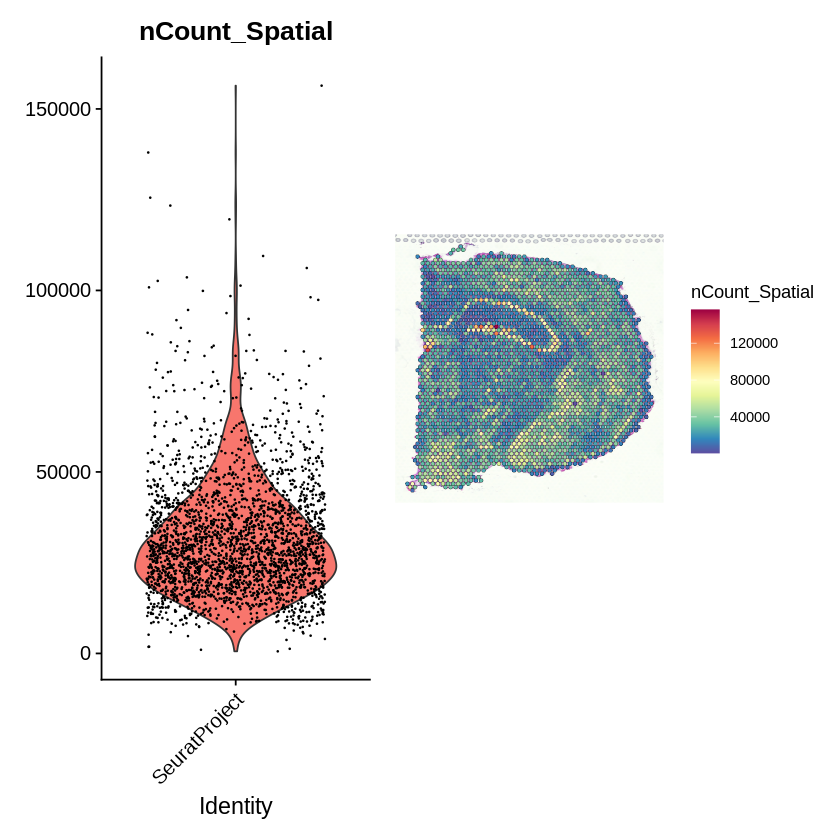

In [8]:
plot1 <- VlnPlot(brain, features = "nCount_Spatial", pt.size = 0.1) + NoLegend()
plot2 <- SpatialFeaturePlot(brain, features = "nCount_Spatial") + theme(legend.position = "right")
wrap_plots(plot1, plot2)

In [11]:
brain <- NormalizeData(brain, normalization.method = "LogNormalize", scale.factor = 10000)

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 10336 rows containing missing values (geom_point).”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 10336 rows containing missing values (geom_point).”


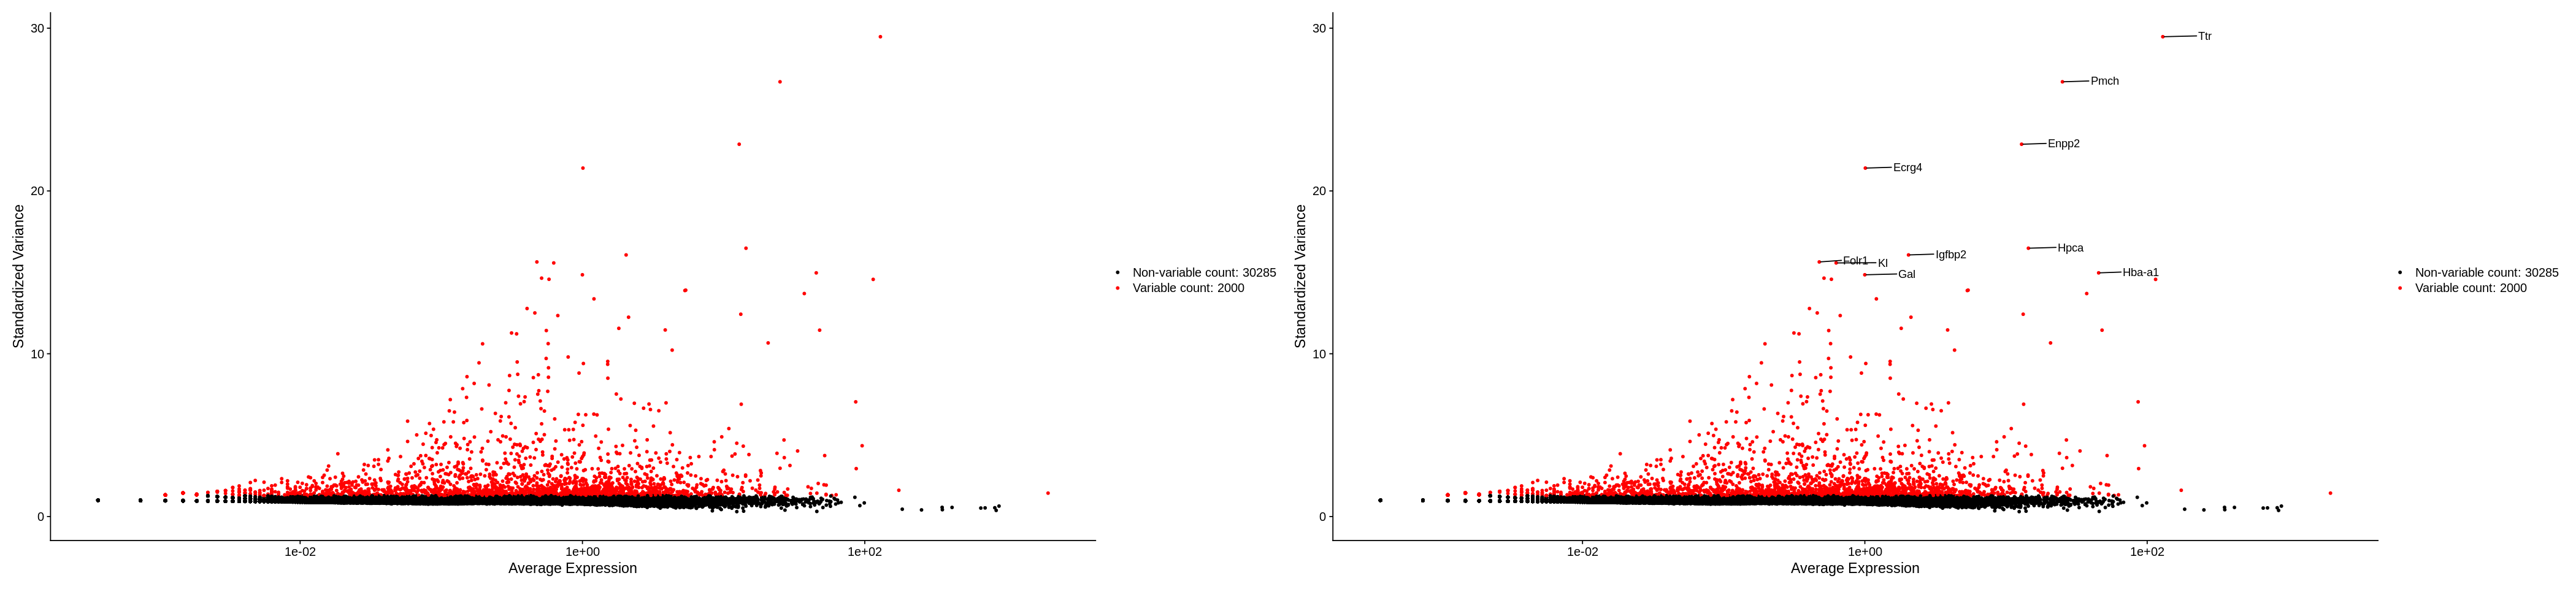

In [12]:
brain <- FindVariableFeatures(brain, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(brain), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(brain)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1 + plot2

In [13]:
all.genes <- rownames(brain)
brain <- ScaleData(brain, features = all.genes,assay="Spatial")

Centering and scaling data matrix



In [14]:
brain <- SCTransform(brain, assay = "Spatial", verbose = FALSE)

In [14]:
brain

An object of class Seurat 
32285 features across 2702 samples within 1 assay 
Active assay: Spatial (32285 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

In [14]:
brain <- RunPCA(brain, assay = "Spatial", verbose = FALSE)
brain <- FindNeighbors(brain, reduction = "pca", dims = 1:50)
brain <- FindClusters(brain,resolution=1.0)
brain <- RunUMAP(brain, reduction = "pca", dims = 1:50)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2702
Number of edges: 88965

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8645
Number of communities: 20
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
23:03:23 UMAP embedding parameters a = 0.9922 b = 1.112

23:03:23 Read 2702 rows and found 50 numeric columns

23:03:23 Using Annoy for neighbor search, n_neighbors = 30

23:03:23 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

23:03:23 Writing NN index file to temp file /tmp/RtmpWIDfZy/file4d31d254dc74b

23:03:23 Searching Annoy index using 1 thread, search_k = 3000

23:03:24 Annoy recall = 100%

23:03:24 Commencing smooth kNN distance calibration using 1 thread

23:03:25 Initializing fr

In [2]:
normal<-readRDS("10X_coronal_brain.rds")

In [3]:
DAPI<-readRDS("10X_coronal_FFPE/10X_coronal_brain_DAPI.rds")

In [4]:
FFPE<-readRDS("10X_coronal_FFPE/10X_coronal_brain_FFPE.rds")

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



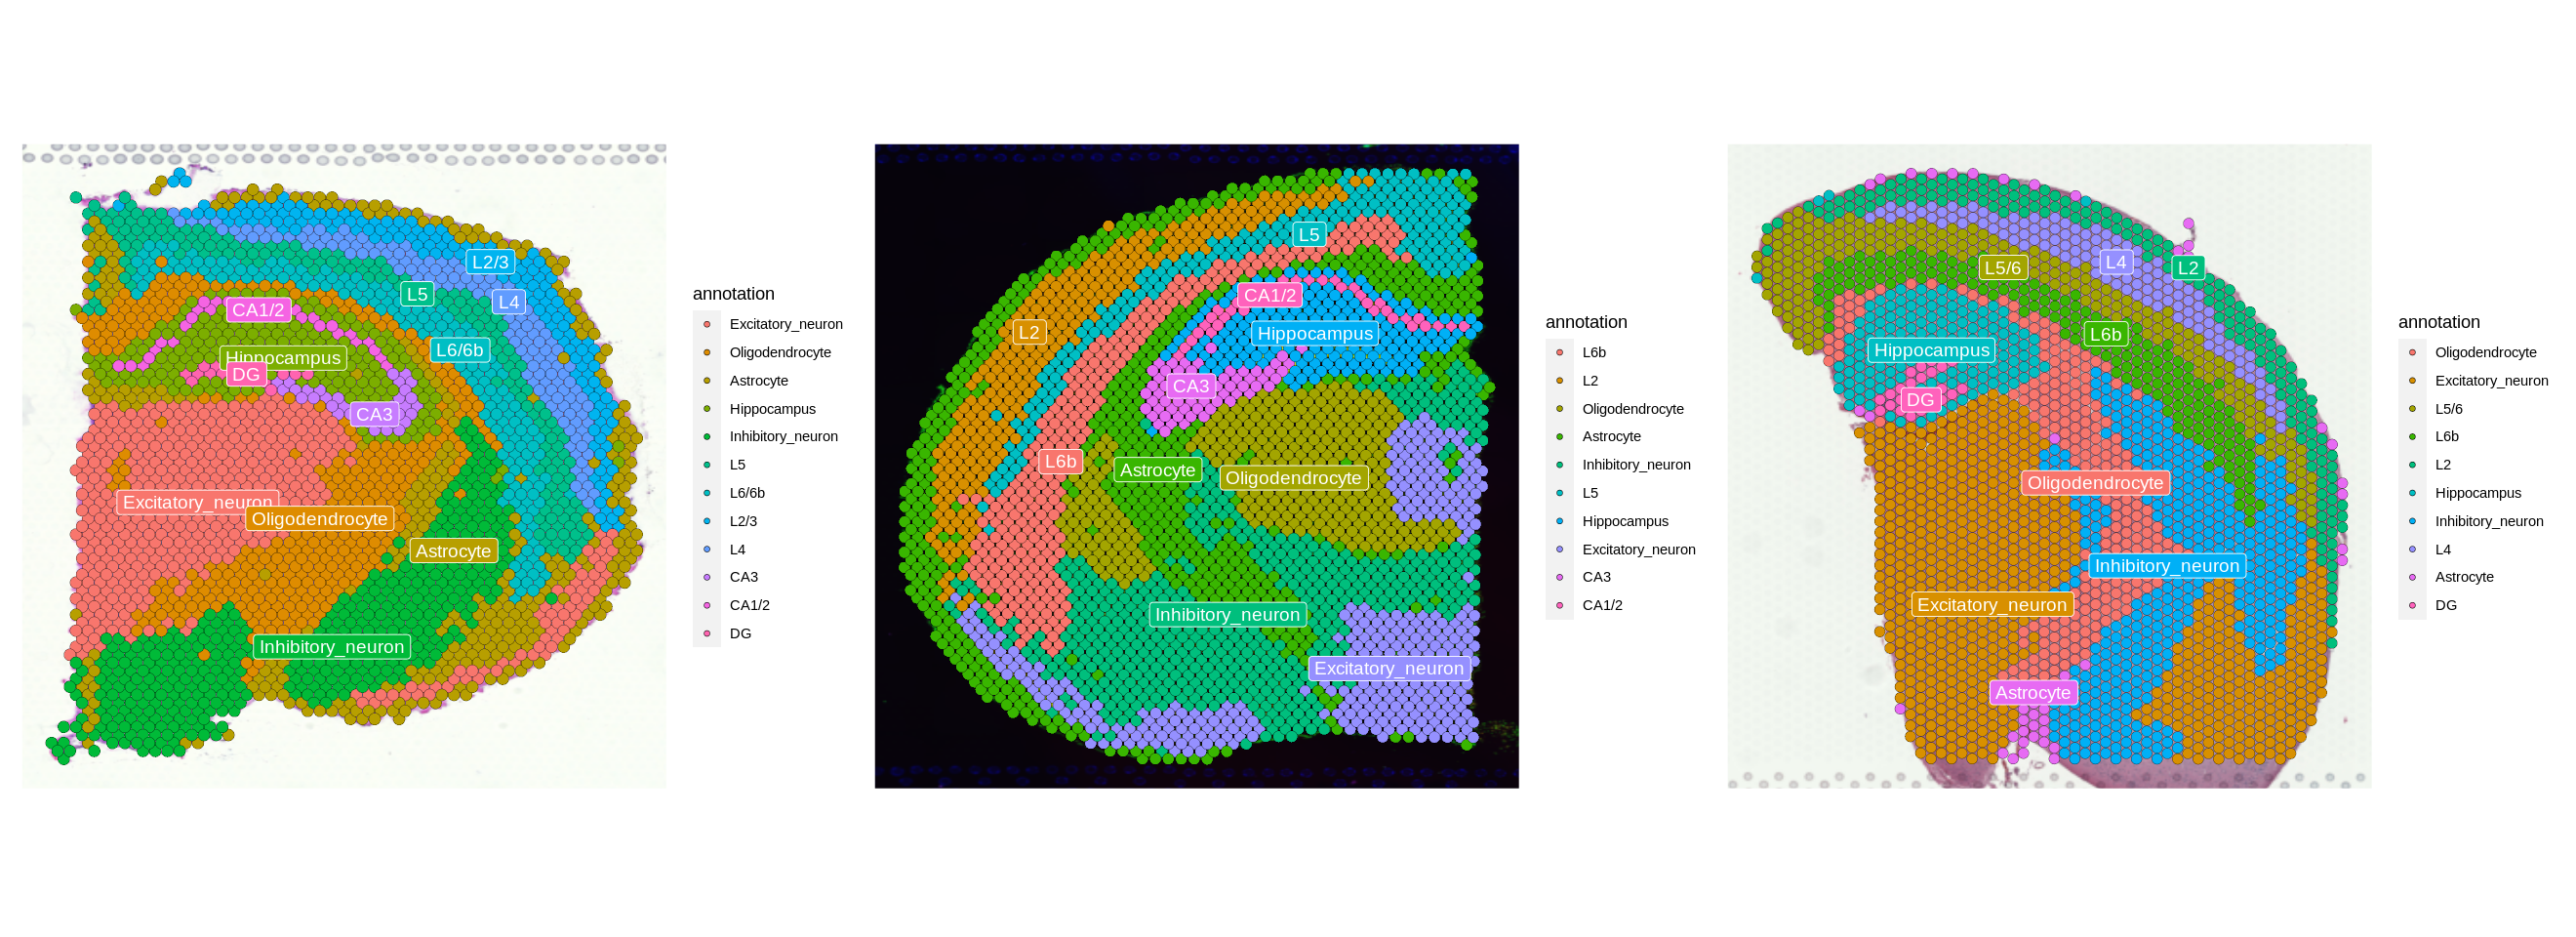

In [6]:
options(repr.plot.width=22, repr.plot.height=8)
p1 <- SpatialDimPlot(normal, label = TRUE, label.size = 4, pt.size=2,group.by="annotation")
p2 <- SpatialDimPlot(DAPI, label = TRUE, label.size = 4, pt.size=2,group.by="annotation")
p3 <- SpatialDimPlot(FFPE, label = TRUE, label.size = 4, pt.size=2,group.by="annotation")
p1 + p2 +p3

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



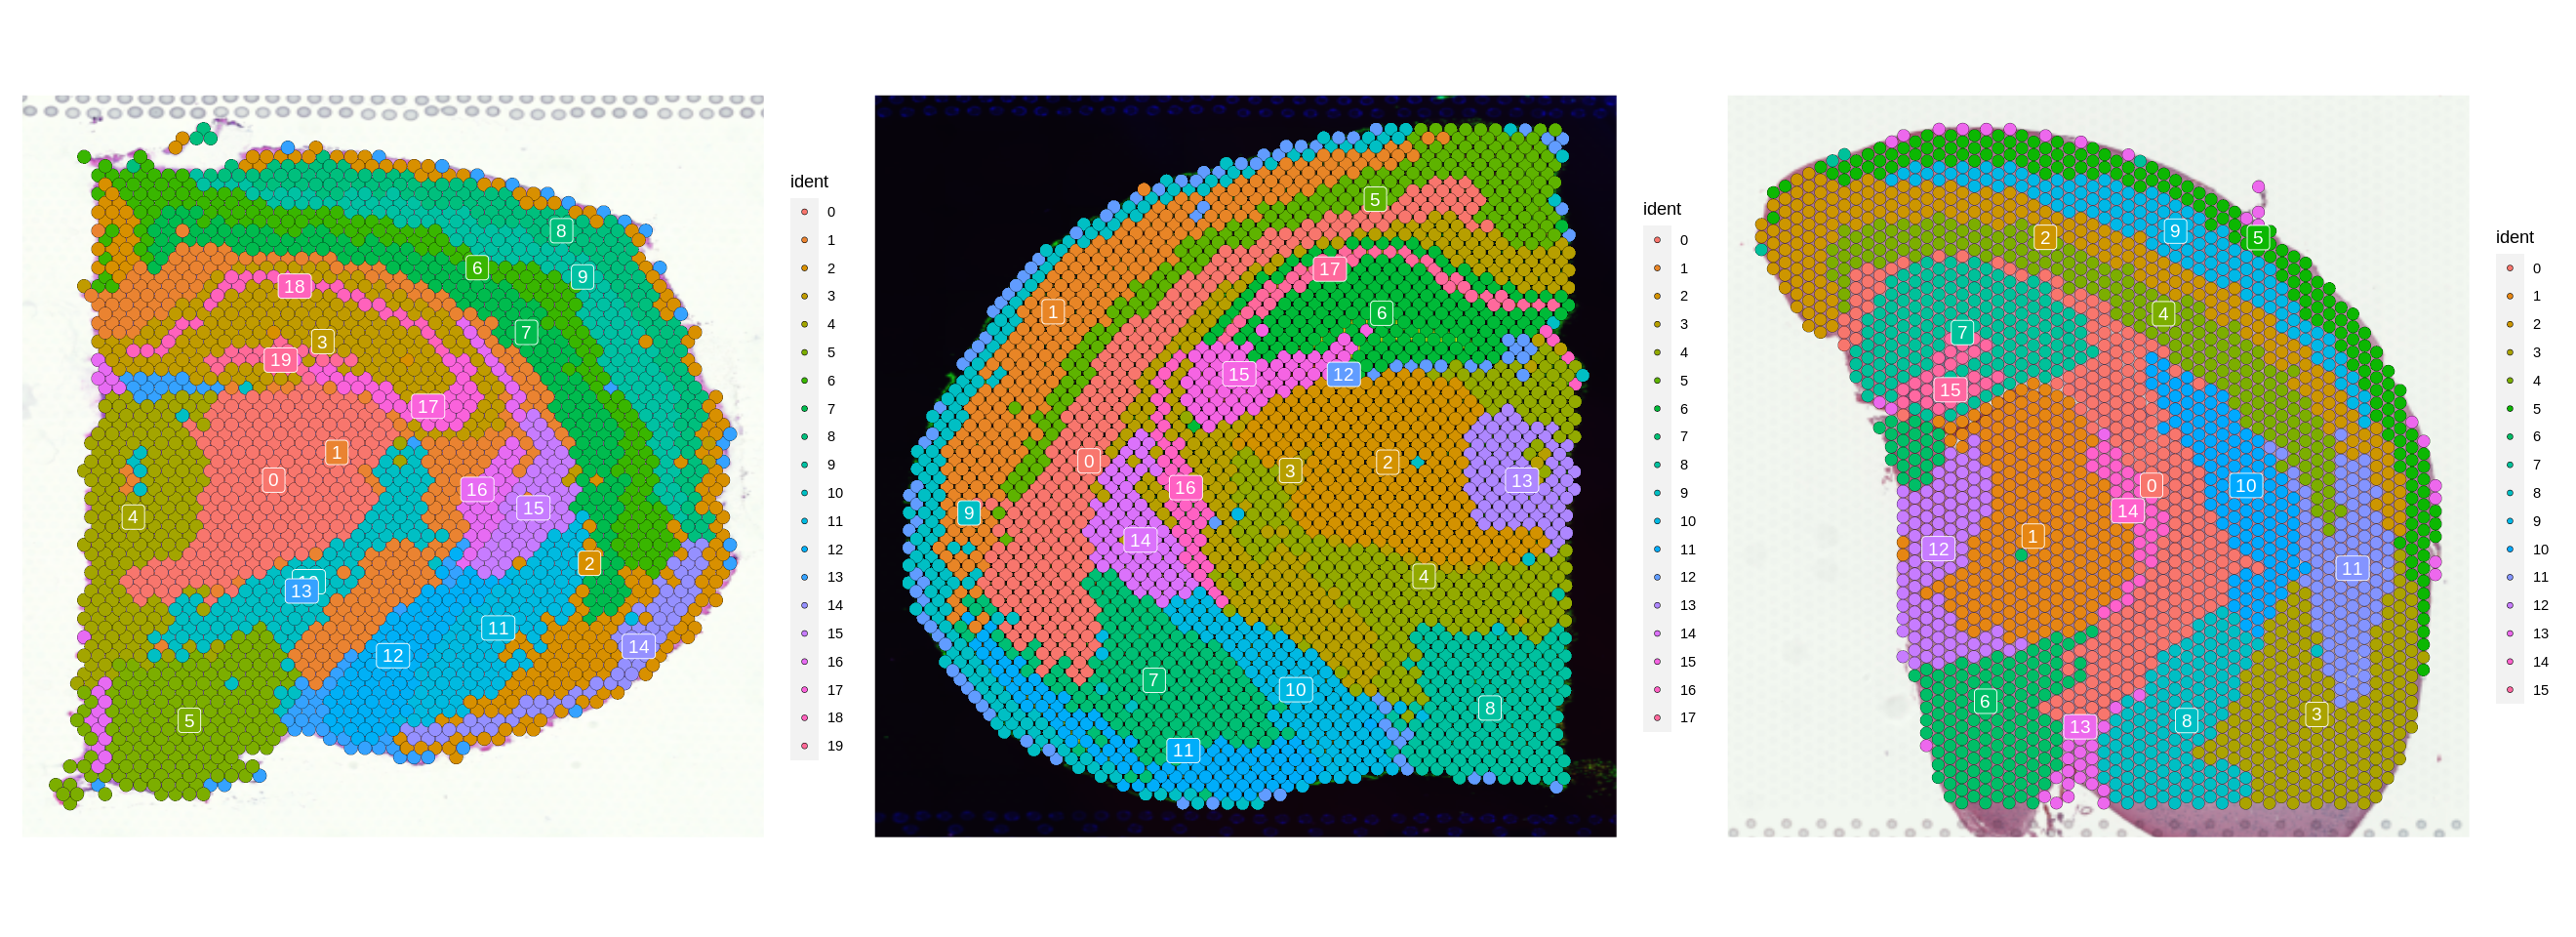

In [7]:
p1 <- SpatialDimPlot(normal, label = TRUE, label.size = 4, pt.size=2)
p2 <- SpatialDimPlot(DAPI, label = TRUE, label.size = 4, pt.size=2)
p3 <- SpatialDimPlot(FFPE, label = TRUE, label.size = 4, pt.size=2)
p1 + p2 +p3

Warning message in FetchData(object = object, vars = features, cells = cells):
“The following requested variables were not found: Nov, Baiap211, prox1, Ctgf, Scf1r, ptdgs, Gad67”


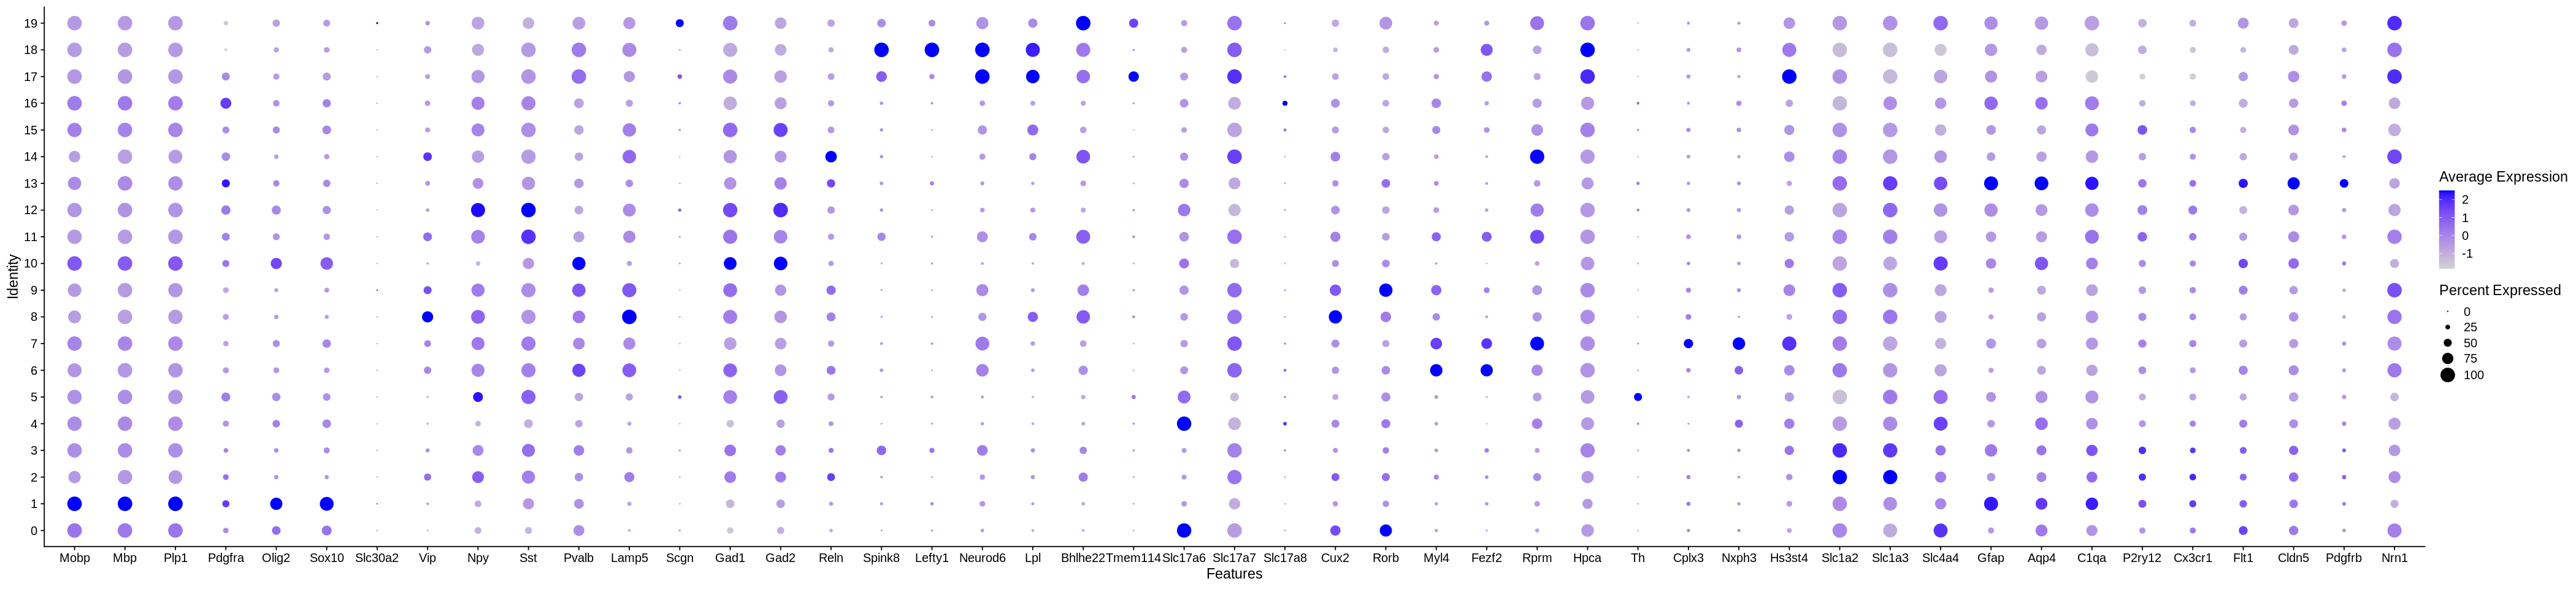

In [16]:
options(repr.plot.width=35, repr.plot.height=8)
DotPlot(brain,feature = markers)

In [18]:
brain$annotation<-brain$seurat_clusters

In [20]:
current.cluster.ids <- c(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19)
new.cluster.ids <- c("Excitatory_neuron","Oligodendrocyte","Astrocyte","Hippocampus","Excitatory_neuron","Inhibitory_neuron","L5","L6/6b","L2/3","L4","Oligodendrocyte","Inhibitory_neuron","Inhibitory_neuron","Astrocyte","Excitatory_neuron","Inhibitory_neuron","Astrocyte","CA3","CA1/2","DG")
brain$annotation<-plyr::mapvalues(x=brain$annotation,from =current.cluster.ids, to = new.cluster.ids)

In [8]:

markers<-c("Mobp", "Mbp",  "Plp1", "Pdgfra",   "Olig2",    "Sox10",    "Slc30a2",  "Vip",  "Npy",  "Sst",  "Pvalb",    "Lamp5",    "Scgn", "Gad1", "Gad2", "Reln", "Nov",  "Baiap211", "Spink8",   "Lefty1",   "Neurod6",  "Lpl",  "Bhlhe22",  "Tmem114",  "Slc17a6",  "Slc17a7",  "Slc17a8",  "Cux2", "Rorb", "Myl4", "Fezf2",    "Rprm", "Hpca", "prox1",    "Th",   "Cplx3",    "Nxph3",    "Hs3st4",   "Ctgf", "Slc1a2",   "Slc1a3",   "Slc4a4",   "Gfap", "Aqp4", "C1qa", "Scf1r",    "P2ry12",   "Cx3cr1",   "ptdgs",    "Flt1", "Cldn5",    "Pdgfrb","Gad67","Nrn1")


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


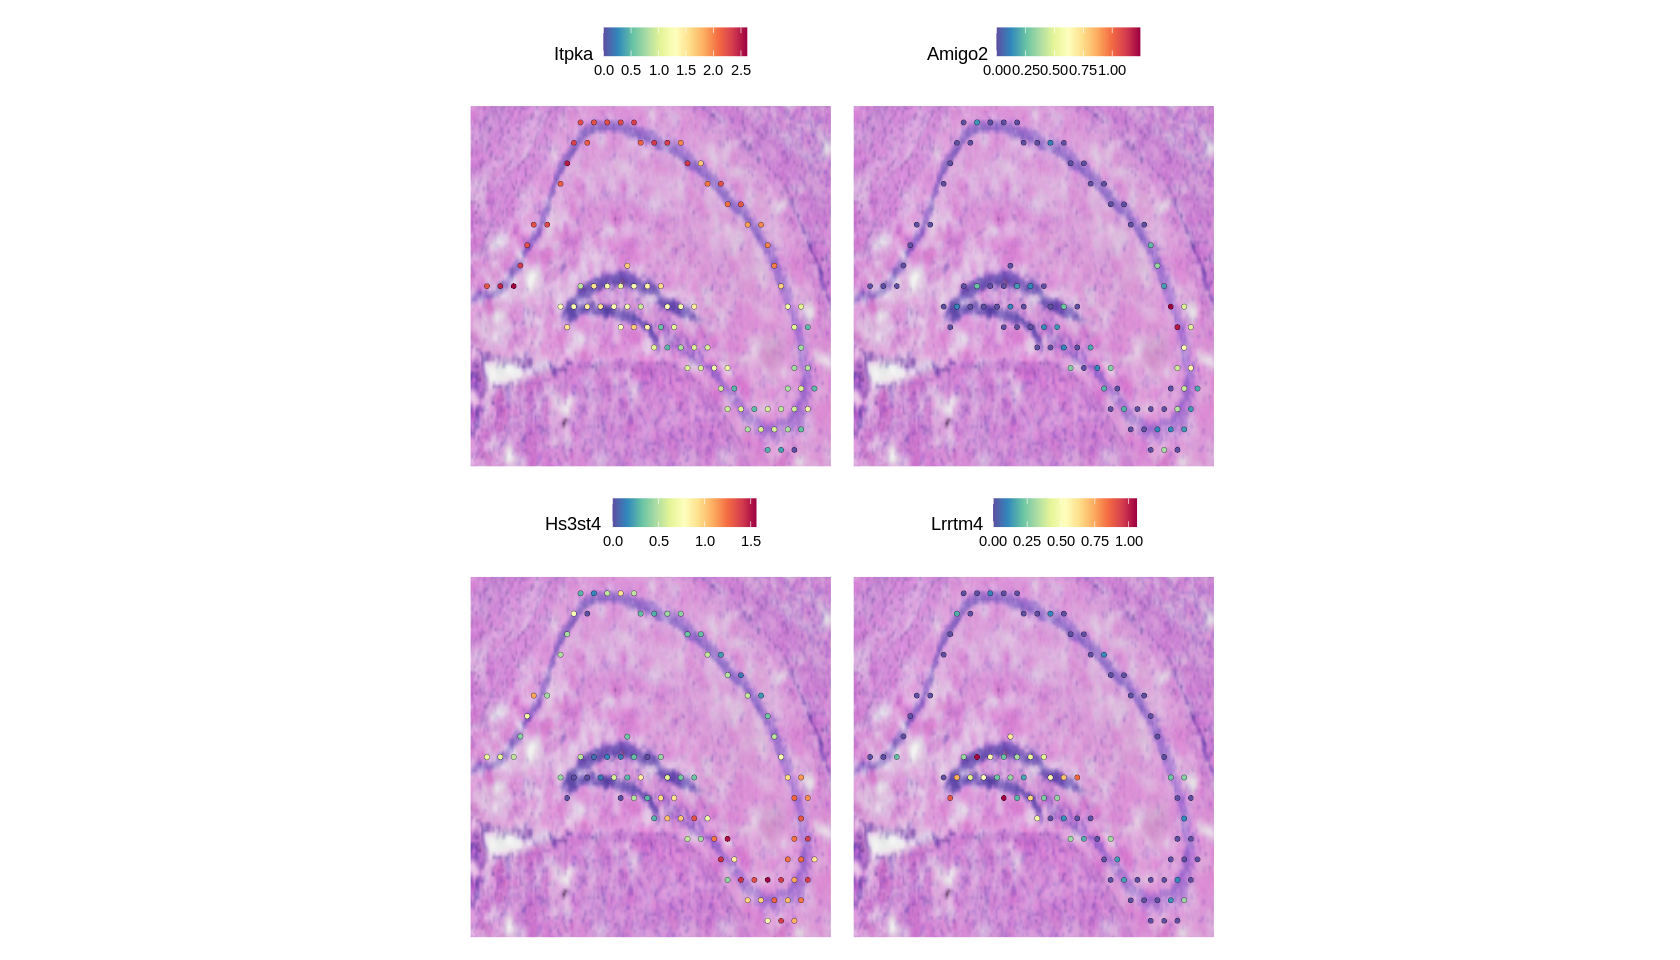

In [36]:
SpatialFeaturePlot(hip, feature=c("Itpka","Amigo2","Hs3st4","Lrrtm4"))

In [18]:
markers<-readRDS("/home/panyan/data1/spatial_batch/marker.rds")

In [63]:
markers

$Oligodendrocyte
[1] "Mobp" "Mbp"  "Plp1"

$OPC
[1] "Pdgfra" "Olig2"  "Sox10" 

$Inhibitory_neuron
 [1] "Slc30a2" "Vip"     "Npy"     "Sst"     "Pvalb"   "Lamp5"   "Scgn"   
 [8] "Gad1"    "Gad2"    "Reln"   

$Hippocampus
[1] "Nov"      "Baiap211" "Spink8"   "Lefty1"   "Neurod6"  "Lpl"      "Bhlhe22" 
[8] "Tmem114" 

$Pan_EX
[1] "Slc17a6" "Slc17a7" "Slc17a8"

$`L2/3`
[1] "Cux2"

$L4
[1] "Rorb"

$L5
[1] "Myl4"  "Fezf2"

$`L5/6`
[1] "Rprm"

$CA
[1] "Hpca"

$DG
[1] "Prox1"

$DA_neuron
[1] "Th"

$L6b
[1] "Cplx3"  "Nxph3"  "Hs3st4" "Ctgf"  

$Astrocyte
[1] "Slc1a2" "Slc1a3" "Slc4a4" "Gfap"   "Aqp4"  

$Microglia
[1] "C1qa"   "Scf1r"  "P2ry12" "Cx3cr1"

$Meninges
[1] "Ptdgs"

$Endothelial
[1] "Flt1"  "Cldn5"

$Pericyte
[1] "Pdgfrb"

In [67]:
brain.markers <- FindAllMarkers(brain, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19



In [22]:
write.csv(b,"brainmarker1.csv")

In [17]:
brain.markers<-read.csv("brain.markers.csv")

In [21]:
b<-brain.markers %>% filter_all(any_vars(. %in% markers))

In [20]:
markers<-c("Mobp",	"Mbp",	"Plp1",	"Pdgfra",	"Olig2",	"Sox10",	"Slc30a2",	"Vip",	"Npy",	"Sst",	"Pvalb",	"Lamp5",	"Scgn",	"Gad1",	"Gad2",	"Reln",	"Nov",	"Baiap211",	"Spink8",	"Lefty1",	"Neurod6",	"Lpl",	"Bhlhe22",	"Tmem114",	"Slc17a6",	"Slc17a7",	"Slc17a8",	"Cux2",	"Rorb",	"Myl4",	"Fezf2",	"Rprm",	"Hpca",	"prox1",	"Th",	"Cplx3",	"Nxph3",	"Hs3st4",	"Ctgf",	"Slc1a2",	"Slc1a3",	"Slc4a4",	"Gfap",	"Aqp4",	"C1qa",	"Scf1r",	"P2ry12",	"Cx3cr1",	"ptdgs",	"Flt1",	"Cldn5",	"Pdgfrb","Gad67","Nrn1")

In [ ]:
16 CA2
18 CA1


In [78]:
brain$hip<-"NA"

In [79]:
brain$hip[brain$seurat_clusters%in%c(17,18,19)]='HIP'

In [24]:
hip<-subset(brain,idents=c(17,18,19))

In [94]:
Idents(brain)<-"seurat_clusters"

In [25]:
hip@meta.data

orig.ident    nCount_Spatial nFeature_Spatial
AAAGGGCAGCTTGAAT-1 SeuratProject  43604          7140           
AACGCGGTCTCCAGCC-1 SeuratProject  74566          8957           
AACGTCAGACTAGTGG-1 SeuratProject 123377         10468           
AAGGCGCGTAAAGCTT-1 SeuratProject 103605          9999           
ACACCTTAAGTAGGGC-1 SeuratProject  87888          9563           
ACATAATAAGGCGGTG-1 SeuratProject  46476          7505           
ACCAAGAACGCGTGTC-1 SeuratProject  89686          9287           
ACTACCAGCTCTCTGG-1 SeuratProject  77550          9442           
ACTCAATAAAGGCACG-1 SeuratProject  32855          6184           
ACTGTCTTCTTTAGAA-1 SeuratProject  23959          5251           
AGACCATGGGATACAA-1 SeuratProject  80844          8834           
AGGACATCGCACGTCG-1 SeuratProject  59669          8259           
AGGGCGTGATCGGCTA-1 SeuratProject  55668          8053           
AGTATAATACTAGGCA-1 SeuratProject  18993          5068           
AGTCGGCCCAAACGAC-1 SeuratProject  83338          9431           
AGTCTTCTCCTCAAAT-1 SeuratProject  54195          7964           
ATACTAGCATGACCCT-1 SeuratProject  55833          8122           
ATAGAGTACTGGGACA-1 SeuratProject  70482          8835           
ATCCAACGCAGTCATA-1 SeuratProject  77674          9494           
ATCTTGACCTGCAACG-1 SeuratProject  46646          7568           
ATGAGGAGTGTTAATC-1 SeuratProject  81989          9395           
ATGCTCAGTGTTGCAT-1 SeuratProject  34242          6430           
CACAGCTAGGGAGTGA-1 SeuratProject  87751          9250           
CACTTCGCCACAGGCT-1 SeuratProject  34206          6612           
CAGAGCATGAGCTTGC-1 SeuratProject  31774          6276           
CAGATACTAACATAGT-1 SeuratProject 119590         10327           
CCAGGGACGTGGCCTC-1 SeuratProject  70502          8449           
CCCTCATTCTGGAATT-1 SeuratProject  43713          7444           
CCTACTGCTTACACTT-1 SeuratProject  33083          6469           
CCTATGGGTTACCGTC-1 SeuratProject  92170          9186           
⋮                  ⋮             ⋮              ⋮               
TAAGGAACTTGTGGGA-1 SeuratProject 101329          9605           
TAATATTGAAATTCGC-1 SeuratProject 100855          9462           
TAGCTAAGTCCGGGAG-1 SeuratProject  84636          9003           
TATCCATATCATGCGA-1 SeuratProject  76131          8990           
TATTTGTTACCCTTTA-1 SeuratProject 156413         10934           
TCAAACTTAGATTGTT-1 SeuratProject  76938          8681           
TCAACCATGTTCGGGC-1 SeuratProject  98451          9921           
TCAGTACTGACCCGCG-1 SeuratProject  41009          7396           
TCCCGCGTACTCCTGG-1 SeuratProject  88337          9146           
TCCGATGGTGCGACAT-1 SeuratProject  51622          7987           
TCCTTTCTTACGCTTA-1 SeuratProject  31271          6081           
TCTAGCATCTTCGATG-1 SeuratProject  48882          7736           
TCTATCGGTCGCAACA-1 SeuratProject  75381          8989           
TCTTCGATACCAATAA-1 SeuratProject  22827          5115           
TCTTGATGCGTAGCGA-1 SeuratProject  20595          4863           
TGAGAATGCTTTACCG-1 SeuratProject  82979          9003           
TGATCGGTTTGACCCT-1 SeuratProject  52892          7740           
TGCAAGAATGACGTAA-1 SeuratProject 125552          9781           
TGCGCAAAGCATTTGG-1 SeuratProject  75855          8591           
TGGGAAATGCCTTTCC-1 SeuratProject  83337          8857           
TGTGTCGCGAGTTGCA-1 SeuratProject  29746          6527           
TTAACACCTCGAACAT-1 SeuratProject  54015          7614           
TTAACCAACCCTCCCT-1 SeuratProject  70864          8691           
TTAATGTAGACCAGGT-1 SeuratProject  83489          8790           
TTACCCTAACAGTCCT-1 SeuratProject  66907          8420           
TTCGACGGGAAGGGCG-1 SeuratProject 109492         10157           
TTCGCACTCGCGTGCT-1 SeuratProject  58614          8403           
TTCTTAGTGAACGGTG-1 SeuratProject  66059          8399           
TTGCTGAAGGAACCAC-1 SeuratProject  85705          9109           
TTGGGACACTGCCCGC-1 SeuratProject  84777          9115 

In [34]:
hip <- RunPCA(hip, assay = "Spatial", verbose = FALSE)
hip <- FindNeighbors(hip, reduction = "pca", dims = 1:50)
hip <- FindClusters(hip,resolution=3)
hip <- RunUMAP(hip, reduction = "pca", dims = 1:50)

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 91
Number of edges: 1464

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.0525
Number of communities: 36
Elapsed time: 0 seconds


26 singletons identified. 10 final clusters.

23:31:05 UMAP embedding parameters a = 0.9922 b = 1.112

23:31:05 Read 91 rows and found 50 numeric columns

23:31:05 Using Annoy for neighbor search, n_neighbors = 30

23:31:05 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

23:31:05 Writing NN index file to temp file /tmp/RtmpWIDfZy/file4d31d68ab8425

23:31:05 Searching Annoy index using 1 thread, search_k = 3000

23:31:05 Annoy recall = 100%

23:31:06 Commencing smooth kNN distance calibration using 1 thread

23:31:06 Initializing from normalized Laplacian + noise

23:31:06 Commencing optimization for 500 epochs, with 2934 positive edges

23:31:07 Optimization finished



In [106]:
hip@meta.data

orig.ident    nCount_Spatial nFeature_Spatial
AAAGGGCAGCTTGAAT-1 SeuratProject  43604          7140           
AACGCGGTCTCCAGCC-1 SeuratProject  74566          8957           
AACGTCAGACTAGTGG-1 SeuratProject 123377         10468           
AAGGCGCGTAAAGCTT-1 SeuratProject 103605          9999           
ACACCTTAAGTAGGGC-1 SeuratProject  87888          9563           
ACATAATAAGGCGGTG-1 SeuratProject  46476          7505           
ACCAAGAACGCGTGTC-1 SeuratProject  89686          9287           
ACTACCAGCTCTCTGG-1 SeuratProject  77550          9442           
ACTCAATAAAGGCACG-1 SeuratProject  32855          6184           
ACTGTCTTCTTTAGAA-1 SeuratProject  23959          5251           
AGACCATGGGATACAA-1 SeuratProject  80844          8834           
AGGACATCGCACGTCG-1 SeuratProject  59669          8259           
AGGGCGTGATCGGCTA-1 SeuratProject  55668          8053           
AGTATAATACTAGGCA-1 SeuratProject  18993          5068           
AGTCGGCCCAAACGAC-1 SeuratProject  83338          9431           
AGTCTTCTCCTCAAAT-1 SeuratProject  54195          7964           
ATACTAGCATGACCCT-1 SeuratProject  55833          8122           
ATAGAGTACTGGGACA-1 SeuratProject  70482          8835           
ATCCAACGCAGTCATA-1 SeuratProject  77674          9494           
ATCTTGACCTGCAACG-1 SeuratProject  46646          7568           
ATGAGGAGTGTTAATC-1 SeuratProject  81989          9395           
ATGCTCAGTGTTGCAT-1 SeuratProject  34242          6430           
CACAGCTAGGGAGTGA-1 SeuratProject  87751          9250           
CACTTCGCCACAGGCT-1 SeuratProject  34206          6612           
CAGAGCATGAGCTTGC-1 SeuratProject  31774          6276           
CAGATACTAACATAGT-1 SeuratProject 119590         10327           
CCAGGGACGTGGCCTC-1 SeuratProject  70502          8449           
CCCTCATTCTGGAATT-1 SeuratProject  43713          7444           
CCTACTGCTTACACTT-1 SeuratProject  33083          6469           
CCTATGGGTTACCGTC-1 SeuratProject  92170          9186           
⋮                  ⋮             ⋮              ⋮               
TAAGGAACTTGTGGGA-1 SeuratProject 101329          9605           
TAATATTGAAATTCGC-1 SeuratProject 100855          9462           
TAGCTAAGTCCGGGAG-1 SeuratProject  84636          9003           
TATCCATATCATGCGA-1 SeuratProject  76131          8990           
TATTTGTTACCCTTTA-1 SeuratProject 156413         10934           
TCAAACTTAGATTGTT-1 SeuratProject  76938          8681           
TCAACCATGTTCGGGC-1 SeuratProject  98451          9921           
TCAGTACTGACCCGCG-1 SeuratProject  41009          7396           
TCCCGCGTACTCCTGG-1 SeuratProject  88337          9146           
TCCGATGGTGCGACAT-1 SeuratProject  51622          7987           
TCCTTTCTTACGCTTA-1 SeuratProject  31271          6081           
TCTAGCATCTTCGATG-1 SeuratProject  48882          7736           
TCTATCGGTCGCAACA-1 SeuratProject  75381          8989           
TCTTCGATACCAATAA-1 SeuratProject  22827          5115           
TCTTGATGCGTAGCGA-1 SeuratProject  20595          4863           
TGAGAATGCTTTACCG-1 SeuratProject  82979          9003           
TGATCGGTTTGACCCT-1 SeuratProject  52892          7740           
TGCAAGAATGACGTAA-1 SeuratProject 125552          9781           
TGCGCAAAGCATTTGG-1 SeuratProject  75855          8591           
TGGGAAATGCCTTTCC-1 SeuratProject  83337          8857           
TGTGTCGCGAGTTGCA-1 SeuratProject  29746          6527           
TTAACACCTCGAACAT-1 SeuratProject  54015          7614           
TTAACCAACCCTCCCT-1 SeuratProject  70864          8691           
TTAATGTAGACCAGGT-1 SeuratProject  83489          8790           
TTACCCTAACAGTCCT-1 SeuratProject  66907          8420           
TTCGACGGGAAGGGCG-1 SeuratProject 109492         10157           
TTCGCACTCGCGTGCT-1 SeuratProject  58614          8403           
TTCTTAGTGAACGGTG-1 SeuratProject  66059          8399           
TTGCTGAAGGAACCAC-1 SeuratProject  85705          9109           
TTGGGACACTGCCCGC-1 SeuratProject  84777          9115 

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



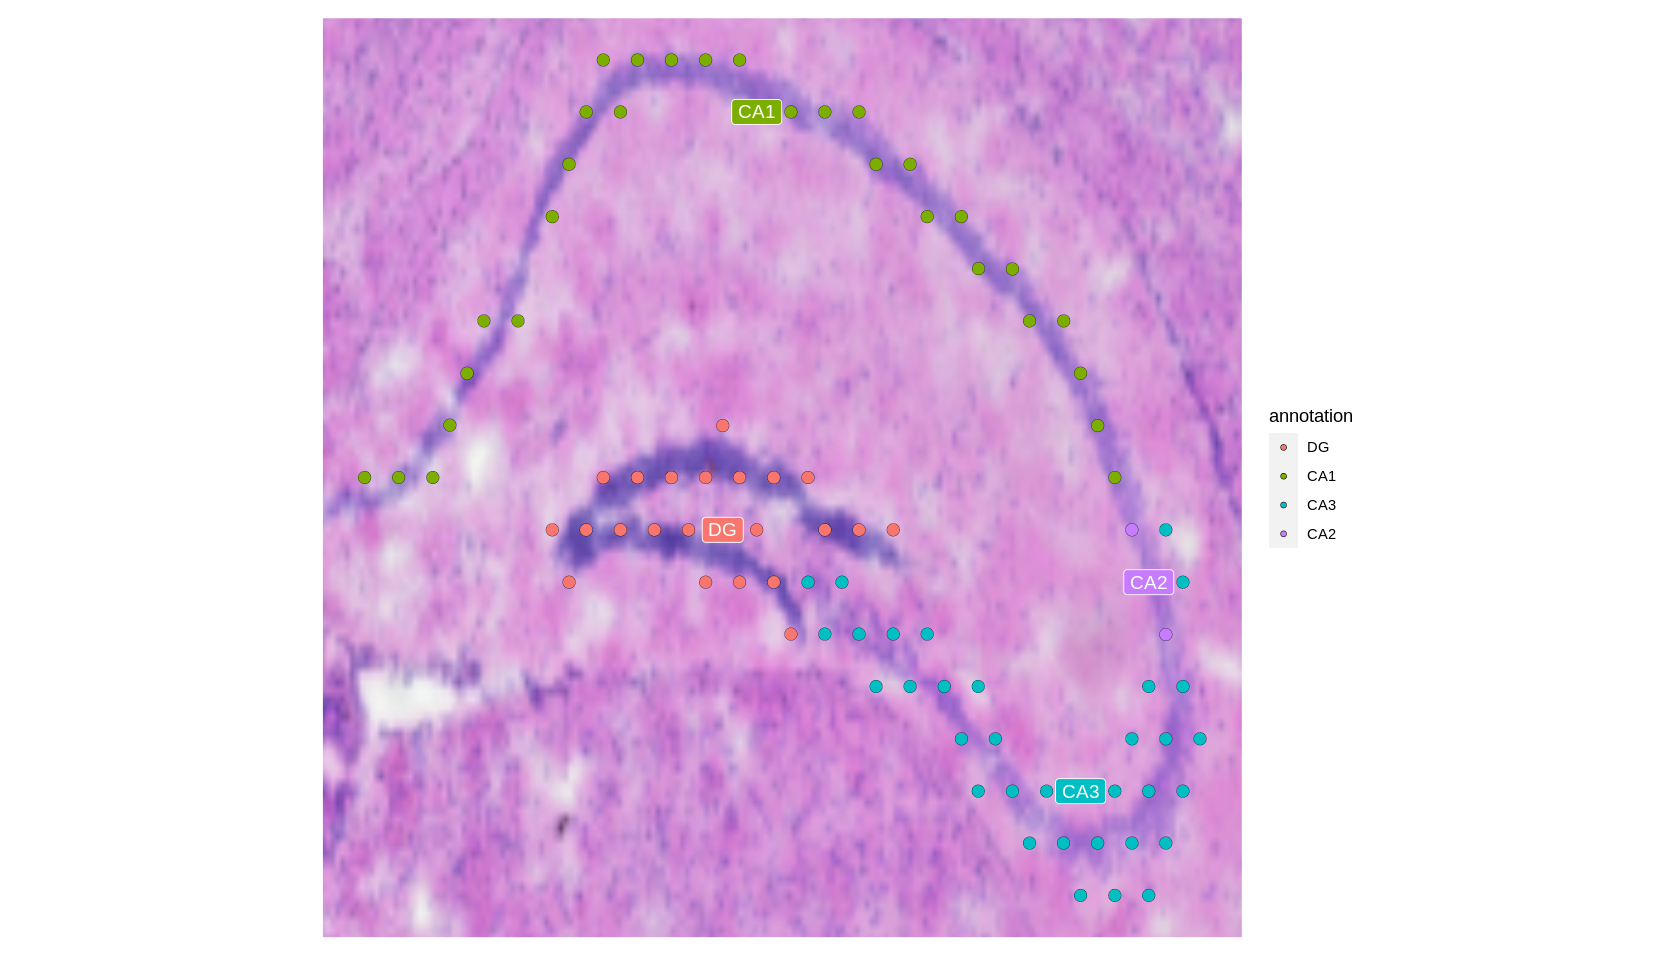

In [42]:
SpatialDimPlot(hip, label = TRUE, label.size = 4, pt.size=1.5,group.by="annotation")

In [37]:
hip$annotation<-hip$`Spatial_snn_res.3`

In [39]:
current.cluster.ids <- c(0,1,2,3,4,5,6,7,8,9)
new.cluster.ids <- c("DG","CA1","CA1","CA1","CA3","CA3","CA1","CA3","CA2","CA3")
hip$annotation<-plyr::mapvalues(x=hip$annotation,from =current.cluster.ids, to = new.cluster.ids)

In [43]:
hip

An object of class Seurat 
32285 features across 91 samples within 1 assay 
Active assay: Spatial (32285 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

In [110]:
hip@meta.data

orig.ident    nCount_Spatial nFeature_Spatial
AAAGGGCAGCTTGAAT-1 SeuratProject  43604          7140           
AACGCGGTCTCCAGCC-1 SeuratProject  74566          8957           
AACGTCAGACTAGTGG-1 SeuratProject 123377         10468           
AAGGCGCGTAAAGCTT-1 SeuratProject 103605          9999           
ACACCTTAAGTAGGGC-1 SeuratProject  87888          9563           
ACATAATAAGGCGGTG-1 SeuratProject  46476          7505           
ACCAAGAACGCGTGTC-1 SeuratProject  89686          9287           
ACTACCAGCTCTCTGG-1 SeuratProject  77550          9442           
ACTCAATAAAGGCACG-1 SeuratProject  32855          6184           
ACTGTCTTCTTTAGAA-1 SeuratProject  23959          5251           
AGACCATGGGATACAA-1 SeuratProject  80844          8834           
AGGACATCGCACGTCG-1 SeuratProject  59669          8259           
AGGGCGTGATCGGCTA-1 SeuratProject  55668          8053           
AGTATAATACTAGGCA-1 SeuratProject  18993          5068           
AGTCGGCCCAAACGAC-1 SeuratProject  83338          9431           
AGTCTTCTCCTCAAAT-1 SeuratProject  54195          7964           
ATACTAGCATGACCCT-1 SeuratProject  55833          8122           
ATAGAGTACTGGGACA-1 SeuratProject  70482          8835           
ATCCAACGCAGTCATA-1 SeuratProject  77674          9494           
ATCTTGACCTGCAACG-1 SeuratProject  46646          7568           
ATGAGGAGTGTTAATC-1 SeuratProject  81989          9395           
ATGCTCAGTGTTGCAT-1 SeuratProject  34242          6430           
CACAGCTAGGGAGTGA-1 SeuratProject  87751          9250           
CACTTCGCCACAGGCT-1 SeuratProject  34206          6612           
CAGAGCATGAGCTTGC-1 SeuratProject  31774          6276           
CAGATACTAACATAGT-1 SeuratProject 119590         10327           
CCAGGGACGTGGCCTC-1 SeuratProject  70502          8449           
CCCTCATTCTGGAATT-1 SeuratProject  43713          7444           
CCTACTGCTTACACTT-1 SeuratProject  33083          6469           
CCTATGGGTTACCGTC-1 SeuratProject  92170          9186           
⋮                  ⋮             ⋮              ⋮               
TAAGGAACTTGTGGGA-1 SeuratProject 101329          9605           
TAATATTGAAATTCGC-1 SeuratProject 100855          9462           
TAGCTAAGTCCGGGAG-1 SeuratProject  84636          9003           
TATCCATATCATGCGA-1 SeuratProject  76131          8990           
TATTTGTTACCCTTTA-1 SeuratProject 156413         10934           
TCAAACTTAGATTGTT-1 SeuratProject  76938          8681           
TCAACCATGTTCGGGC-1 SeuratProject  98451          9921           
TCAGTACTGACCCGCG-1 SeuratProject  41009          7396           
TCCCGCGTACTCCTGG-1 SeuratProject  88337          9146           
TCCGATGGTGCGACAT-1 SeuratProject  51622          7987           
TCCTTTCTTACGCTTA-1 SeuratProject  31271          6081           
TCTAGCATCTTCGATG-1 SeuratProject  48882          7736           
TCTATCGGTCGCAACA-1 SeuratProject  75381          8989           
TCTTCGATACCAATAA-1 SeuratProject  22827          5115           
TCTTGATGCGTAGCGA-1 SeuratProject  20595          4863           
TGAGAATGCTTTACCG-1 SeuratProject  82979          9003           
TGATCGGTTTGACCCT-1 SeuratProject  52892          7740           
TGCAAGAATGACGTAA-1 SeuratProject 125552          9781           
TGCGCAAAGCATTTGG-1 SeuratProject  75855          8591           
TGGGAAATGCCTTTCC-1 SeuratProject  83337          8857           
TGTGTCGCGAGTTGCA-1 SeuratProject  29746          6527           
TTAACACCTCGAACAT-1 SeuratProject  54015          7614           
TTAACCAACCCTCCCT-1 SeuratProject  70864          8691           
TTAATGTAGACCAGGT-1 SeuratProject  83489          8790           
TTACCCTAACAGTCCT-1 SeuratProject  66907          8420           
TTCGACGGGAAGGGCG-1 SeuratProject 109492         10157           
TTCGCACTCGCGTGCT-1 SeuratProject  58614          8403           
TTCTTAGTGAACGGTG-1 SeuratProject  66059          8399           
TTGCTGAAGGAACCAC-1 SeuratProject  85705          9109           
TTGGGACACTGCCCGC-1 SeuratProject  84777          9115 

In [44]:
saveRDS(hip,"10X_coronal_brain_Hippo.rds")

In [45]:
saveRDS(brain,"10X_coronal_brain.rds")